# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep= '\t', decimal='-')   
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'floor'}>, <AxesSubplot:>]],
      dtype=object)

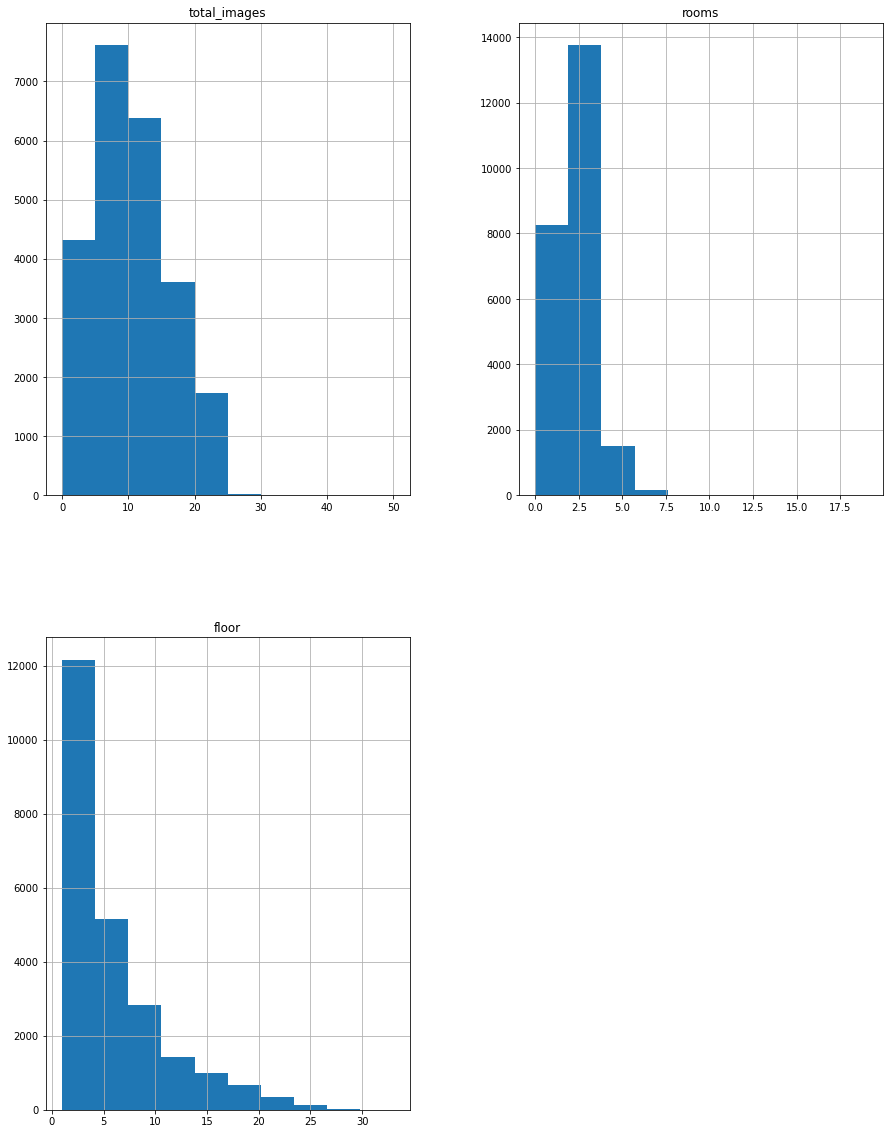

In [2]:
data.hist(figsize=(15, 20))

### Предобработка данных

In [3]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
data.describe()

,total_images,rooms,floor
count,23699.000000,23699.000000,23699.000000
mean,9.858475,2.070636,5.892358
std,5.682529,1.078405,4.885249
min,0.000000,0.000000,1.000000
25%,6.000000,1.000000,2.000000
50%,9.000000,2.000000,4.000000
75%,14.000000,3.000000,8.000000
max,50.000000,19.000000,33.000000


In [5]:
# меняем названия столбцов
data = data.rename(columns={'total_images':'число фотографий'})
data = data.rename(columns={'last_price':'цена на момент снятия с публикации'})
data = data.rename(columns={'total_area':'общая площадь'})
data = data.rename(columns={'first_day_exposition':'дата публикации'})
data = data.rename(columns={'rooms':'число комнат'})
data = data.rename(columns={'ceiling_height':'высота потолков'})
data = data.rename(columns={'living_area':'жилая площадь'})
data = data.rename(columns={'floor':'этаж'})
data = data.rename(columns={'is_apartment':'апартаменты'})
data = data.rename(columns={'studio':'квартира-студия'})
data = data.rename(columns={'open_plan':'свободная планировка'})
data = data.rename(columns={'kitchen_area':'площадь кухни'})
data = data.rename(columns={'balcony':'число балконов'})
data = data.rename(columns={'locality_name':'название населённого пункта'})
data = data.rename(columns={'airports_nearest':'расстояние до аэропорта'}) 
data = data.rename(columns={'cityCenters_nearest':'расстояние до центра города'})
data = data.rename(columns={'parks_around3000':'парки в радиусе 3 км'})
data = data.rename(columns={'parks_nearest':'расстояние до парка'})
data = data.rename(columns={'ponds_around3000':'водоёмы в радиусе 3 км'})
data = data.rename(columns={'ponds_nearest':'расстояние до ближайшего водоёма'})
data = data.rename(columns={'days_exposition':'размещено объявление (от публикации до снятия)'})
data = data.rename(columns={'floors_total':'этажей в доме'})

In [6]:
 # заменяем балконы на 0
data['число балконов'] = data['число балконов'].fillna(0) 


In [7]:
# Приводим всё к нижнему региструб, заменяем все "ё" на "е",заменяем "городской поселок" 
# на "поселок городского типа", проверяем наличие явных дубликатов
data['название населённого пункта'] = data['название населённого пункта'].str.lower()
data['название населённого пункта'] = data['название населённого пункта'].str.replace('ё', 'е')
data['название населённого пункта'] = data['название населённого пункта'].str.replace('городской поселок','поселок городского типа')
data.duplicated().sum()

0

In [8]:
# Удалем строки 
data['название населённого пункта'].dropna(inplace=True)
data['этажей в доме'].dropna(inplace=True)

In [9]:
# меняем формат даты
data['дата публикации'] = pd.to_datetime(data['дата публикации'], format='%Y-%m-%dT%H:%M:%S')

In [10]:
# меняем типы данных на дробные
data['цена на момент снятия с публикации'] = pd.to_numeric(data['цена на момент снятия с публикации'], errors='coerce')
data['общая площадь'] = pd.to_numeric(data['общая площадь'], errors='coerce')
data['этажей в доме'] = pd.to_numeric(data['этажей в доме'], errors='coerce')
data['жилая площадь'] = pd.to_numeric(data['жилая площадь'], errors='coerce')
data['апартаменты'] = pd.to_numeric(data['апартаменты'], errors='coerce')
data['площадь кухни'] = pd.to_numeric(data['площадь кухни'], errors='coerce')
data['число балконов'] = pd.to_numeric(data['число балконов'], errors='coerce')
data['расстояние до аэропорта'] = pd.to_numeric(data['расстояние до аэропорта'], errors='coerce')
data['расстояние до центра города'] = pd.to_numeric(data['расстояние до центра города'], errors='coerce')
data['парки в радиусе 3 км'] = pd.to_numeric(data['парки в радиусе 3 км'], errors='coerce')
data['расстояние до парка'] = pd.to_numeric(data['расстояние до парка'], errors='coerce')
data['водоёмы в радиусе 3 км'] = pd.to_numeric(data['водоёмы в радиусе 3 км'], errors='coerce')
data['расстояние до ближайшего водоёма'] = pd.to_numeric(data['расстояние до ближайшего водоёма'], errors='coerce')
data['размещено объявление (от публикации до снятия)'] = pd.to_numeric(data['размещено объявление (от публикации до снятия)'], errors='coerce')
data['высота потолков'] = data['высота потолков'].astype(float)

In [11]:
#округляем
round(data['число фотографий'])
round(data['цена на момент снятия с публикации'])
round(data['общая площадь'])
round(data['высота потолков'])
round(data['этажей в доме'])
round(data['жилая площадь'])
round(data['парки в радиусе 3 км'])
round(data['расстояние до парка'])
round(data['водоёмы в радиусе 3 км'])
round(data['расстояние до ближайшего водоёма'])
round(data['размещено объявление (от публикации до снятия)'])
round(data['расстояние до парка'])

0        482.0
1          NaN
2         90.0
3         84.0
4        112.0
         ...  
23694    796.0
23695      NaN
23696      NaN
23697    173.0
23698      NaN
Name: расстояние до парка, Length: 23699, dtype: float64

In [12]:
data.isna().sum() 

число фотографий                                      0
цена на момент снятия с публикации                    0
общая площадь                                         0
дата публикации                                       0
число комнат                                          0
высота потолков                                    9195
этажей в доме                                        86
жилая площадь                                      1903
этаж                                                  0
апартаменты                                       20924
квартира-студия                                       0
свободная планировка                                  0
площадь кухни                                      2278
число балконов                                        0
название населённого пункта                          49
расстояние до аэропорта                            5542
расстояние до центра города                        5519
парки в радиусе 3 км                            

In [13]:
data.head(30)

,число фотографий,цена на момент снятия с публикации,общая площадь,дата публикации,число комнат,высота потолков,этажей в доме,жилая площадь,этаж,апартаменты,...,площадь кухни,число балконов,название населённого пункта,расстояние до аэропорта,расстояние до центра города,парки в радиусе 3 км,расстояние до парка,водоёмы в радиусе 3 км,расстояние до ближайшего водоёма,размещено объявление (от публикации до снятия)
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,9.10,0.0,поселок городского типа янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,поселок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,8.81,0.0,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [14]:
# цена 1 квадратного метра
data['один квадратный метр'] = data['цена на момент снятия с публикации'] / data['общая площадь']
# день публикации  (0 - понедельник, 1 - вторник ..)
data['день публикации'] = data['дата публикации'].dt.dayofweek
# месяц публикации 
data['месяц публикации'] = data['дата публикации'].dt.month
# год публикации
data['год публикации'] = data['дата публикации'].dt.year
#расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
data['расстояние до центра города в км'] = data['расстояние до центра города'] / 1000
round(data['расстояние до центра города в км'])

#день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
data['день_публикации'] = data['дата публикации'].dt.dayofweek

#тип этажа квартиры (значения — «первый», «последний», «другой»)

def тип_этажа(этаж):
    if этаж ['этаж'] == 1:
        return 'первый'
    elif этаж ['этаж'] == этаж ['этажей в доме']:
        return 'последний'
    else:
        return 'другой'
data['тип_этажа'] = data.apply(тип_этажа,axis = 1)

data.head(20)

,число фотографий,цена на момент снятия с публикации,общая площадь,дата публикации,число комнат,высота потолков,этажей в доме,жилая площадь,этаж,апартаменты,...,водоёмы в радиусе 3 км,расстояние до ближайшего водоёма,размещено объявление (от публикации до снятия),один квадратный метр,день публикации,месяц публикации,год публикации,расстояние до центра города в км,день_публикации,тип_этажа
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,2.0,755.0,NaN,120370.370370,3,3,2019,16.028,3,другой
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,0.0,NaN,81.0,82920.792079,1,12,2018,18.603,1,первый
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,2.0,574.0,558.0,92785.714286,3,8,2015,13.933,3,другой
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,3.0,234.0,424.0,408176.100629,4,7,2015,6.800,4,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,1.0,48.0,121.0,100000.000000,1,6,2018,8.098,1,другой
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,NaN,NaN,55.0,95065.789474,0,9,2018,NaN,0,другой
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,0.0,NaN,155.0,99195.710456,3,11,2017,19.143,3,другой
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,0.0,NaN,NaN,110544.692737,3,4,2019,11.634,3,другой
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,NaN,NaN,189.0,87454.764777,2,5,2018,NaN,2,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,0.0,NaN,289.0,88524.590164,6,2,2017,15.008,6,другой


*Исследовательский анализ данных*

Построили гистограммы для:

1 
общая площадь;
Наблюдаем очень малое количество квартир с общей площадью более 100 кв.м

2 
жилая площадь;
Наблюдаем два пика - на 18 кв.м. и на 30 кв.м.  есть явный провал около 24 кв.м.

3-4 
площадь кухни;
кухни в основном до 15 кв.м, большой пик на 6 кв.м.

5-6 
цена объекта;
в основном равномерно

7-8 
количество комнат;
1-4 комнатные квртиры преобладают, что логично 

9-10
высота потолков;
от 2.5м - 3м основные показатели

11-12
этаж квартиры;
Больше всего квартир с 1 по 5 этаж. Питер не город небоскрёбов

13-14 
общее количество этажей в доме;
2х - 5ти этажные здания 


15-16    
расстояние до центра города в метрах;
от 10 км. до 20 км. Так же есть всплески на 30 км. и 5 км.

17-18
расстояние до ближайшего аэропорта;
Здесь видим довольно "шумный" график. 10-60 км

19-20
расстояние до ближайшего парка;
Судя по графику больше всего квартир с парками на расстоянии до 700м.

21-22
день и месяц публикации объявления.

Видим провал в публикации объявлений в субботу и воскресенье, что логично.
23-24
апрель-август-октябрь месяцы активности 


тип этажа квартиры («первый», «последний», «другой») в этом случае используем тип bar;
Больше всего квартир на "другом" этаже и это логично. Первых и последних этажей одинакого мало.

25 
продажа осуществлялась в основном до 200 дней - быстрые продажи
больше года - затяжные 

26
тип этажа квартиры («первый», «последний», «другой»);
Больше всего квартир на "другом" этаже и это логично. Первых и последних этажей мало.


Ожидаемо самая дорогая недвижимость в Санкт-Петербурге.
В ТОП-10 входят ближайшие к Санкт-Петербургу города.


Text(0, 0.5, 'Количество квартир')

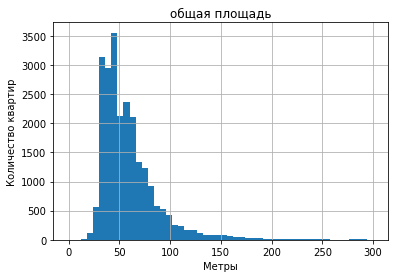

In [15]:
#1 
import matplotlib.pyplot as plt 
data['общая площадь'].hist(range=(0, 300), bins=50)
plt.title('общая площадь')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

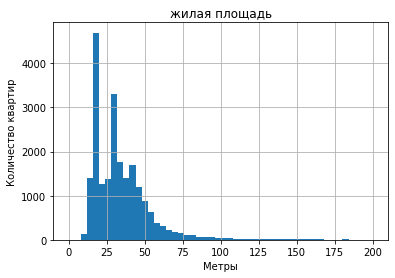

In [16]:
#2 
data['жилая площадь'].hist(range=(0, 200), bins=50)
plt.title('жилая площадь')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

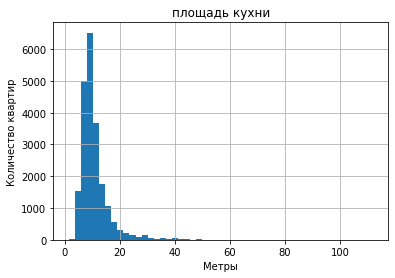

In [17]:
#3 
data.hist('площадь кухни', bins=50);
plt.title('площадь кухни')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

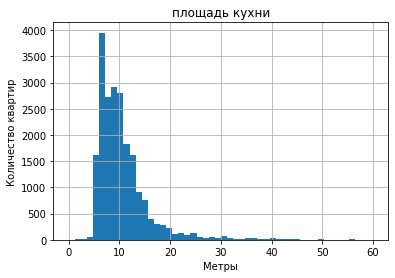

In [18]:
#4
data['площадь кухни'].hist(range=(0, 60), bins=50)
plt.title('площадь кухни')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

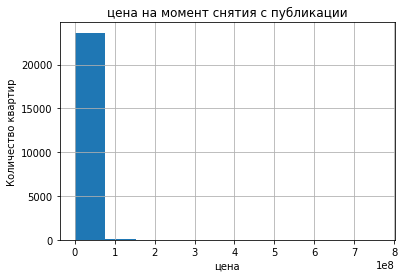

In [19]:
#5
data.hist('цена на момент снятия с публикации', bins=10);
plt.title('цена на момент снятия с публикации')
plt.xlabel('цена')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

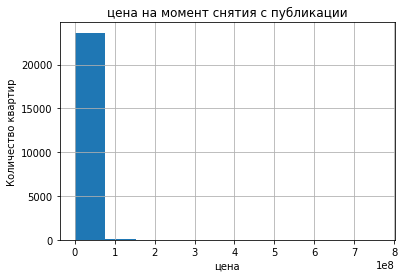

In [20]:
#6 
data['цена на момент снятия с публикации'].hist()
plt.title('цена на момент снятия с публикации')
plt.xlabel('цена')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

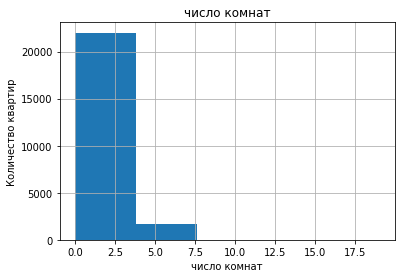

In [21]:
#7 
data.hist('число комнат', bins=5);
plt.title('число комнат')
plt.xlabel('число комнат')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

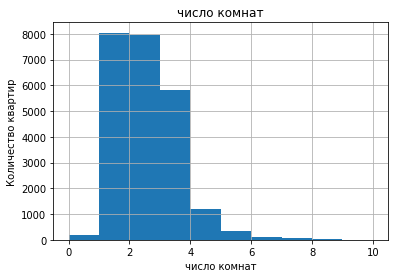

In [22]:
#8 
data['число комнат'].hist(range=(0, 10), bins=10)
plt.title('число комнат')
plt.xlabel('число комнат')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

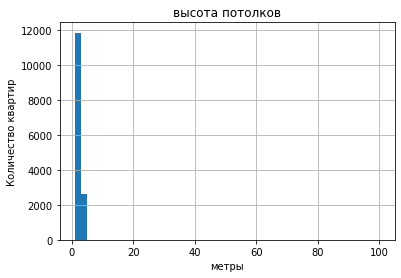

In [23]:
#9 
data.hist('высота потолков', bins=50);
plt.title('высота потолков')
plt.xlabel('метры')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

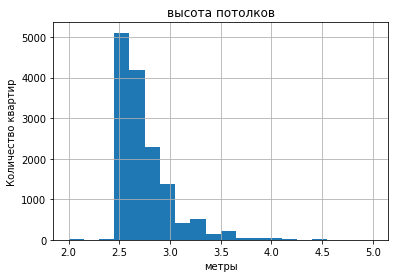

In [24]:
#10 
data['высота потолков'].hist(range=(2, 5), bins=20)
plt.title('высота потолков')
plt.xlabel('метры')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

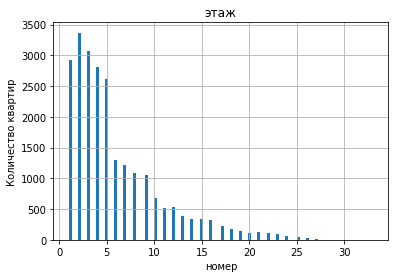

In [25]:
#11 
data.hist('этаж', bins=100);
plt.title('этаж')
plt.xlabel('номер')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

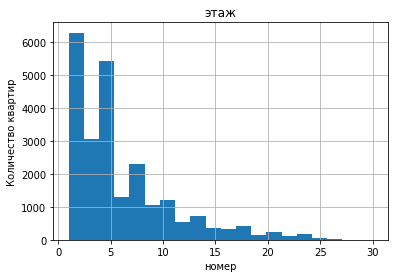

In [26]:
#12 
data['этаж'].hist(range=(1, 30), bins=20) 
plt.title('этаж')
plt.xlabel('номер')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

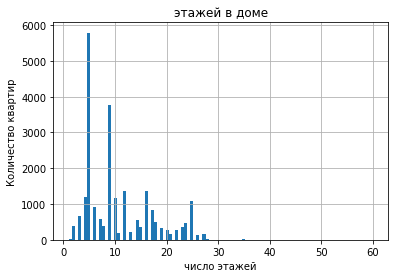

In [27]:
#13
data.hist('этажей в доме', bins=100);
plt.title('этажей в доме')
plt.xlabel('число этажей')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

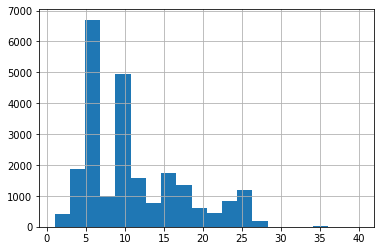

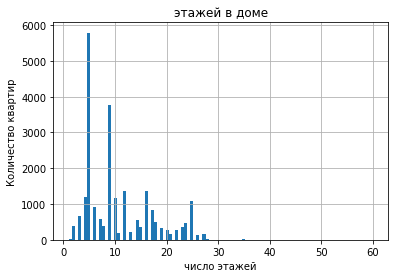

In [28]:
#14 
data['этажей в доме'].hist(range=(1, 40), bins=20)
data.hist('этажей в доме', bins=100);
plt.title('этажей в доме')
plt.xlabel('число этажей')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

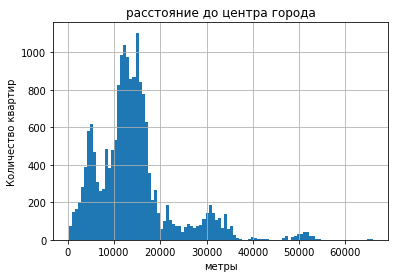

In [29]:
#15 
data.hist('расстояние до центра города', bins=100);
plt.title('расстояние до центра города')
plt.xlabel('метры')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

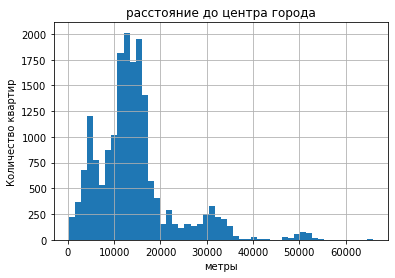

In [30]:
#16 
data['расстояние до центра города'].hist(bins=50)
plt.title('расстояние до центра города')
plt.xlabel('метры')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

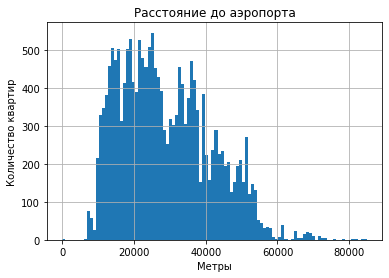

In [31]:
#17 
data.hist('расстояние до аэропорта', bins=100);
plt.title('Расстояние до аэропорта')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

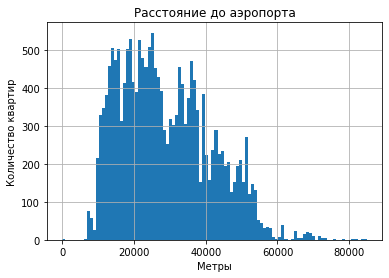

In [32]:
#18 
data['расстояние до аэропорта'].hist(bins=100)
plt.title('Расстояние до аэропорта')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

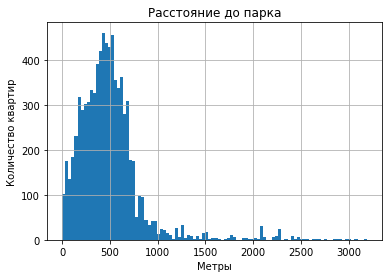

In [33]:
#19 
data.hist('расстояние до парка', bins=100);
plt.title('Расстояние до парка')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

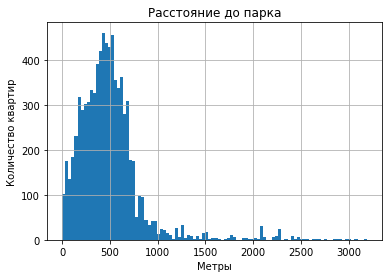

In [34]:
#20 
data['расстояние до парка'].hist(bins=100)
plt.title('Расстояние до парка')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

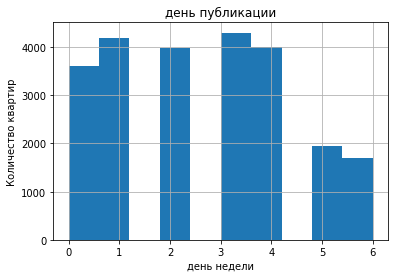

In [35]:
#21 
data.hist('день публикации');
plt.title('день публикации')
plt.xlabel('день недели')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

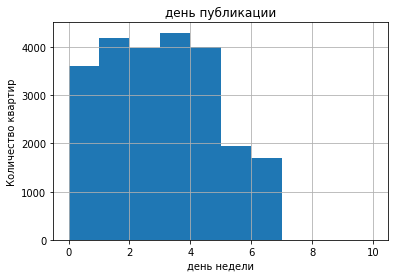

In [36]:
#22 
data['день публикации'].hist(range=(0, 10), bins=10)
plt.title('день публикации')
plt.xlabel('день недели')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

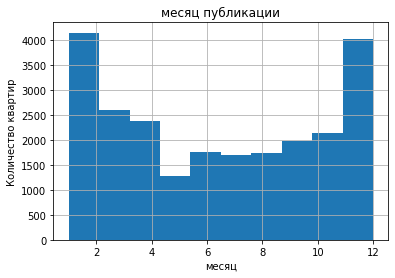

In [37]:
#23 
data.hist('месяц публикации');
plt.title('месяц публикации')
plt.xlabel('месяц')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

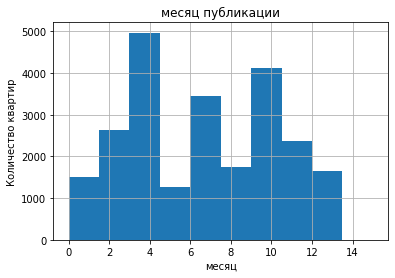

In [38]:
#24 
data['месяц публикации'].hist(range=(0, 15), bins=10)
plt.title('месяц публикации')
plt.xlabel('месяц')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

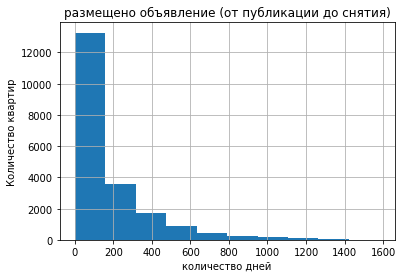

In [39]:
data.hist('размещено объявление (от публикации до снятия)')
plt.title('размещено объявление (от публикации до снятия)')
plt.xlabel('количество дней')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

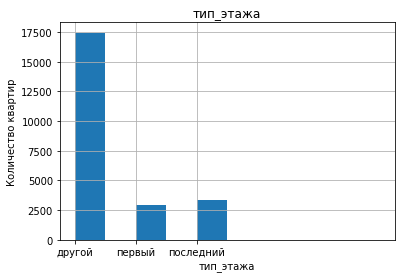

In [40]:
#26
data['тип_этажа'].hist(range=(0, 5), bins=10)
plt.title('тип_этажа')
plt.xlabel('тип_этажа')
plt.ylabel('Количество квартир')

Населённые пункты с самой высокой и низкой стоимостью квадратного метра:

санкт-петербург	15721

выборг	237	58158.319871


In [41]:
data.pivot_table(index='название населённого пункта', values='один квадратный метр', aggfunc={'median','count'}).sort_values(by='count', ascending=False).head(10).sort_values(by='median',ascending=False)

,count,median
название населённого пункта,,
санкт-петербург,15721,104761.904762
пушкин,369,100000.000000
деревня кудрово,299,91860.465116
поселок парголово,327,91642.857143
поселок мурино,556,85878.462169
поселок шушары,440,76876.172608
колпино,338,74723.748474
гатчина,307,67796.610169
всеволожск,398,65789.473684


In [62]:
data['расстояние до центра города в км'] = data['расстояние до центра города в км'].fillna(0)
data['расстояние до центра города в км'] = data['расстояние до центра города в км'].astype(int) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   число фотографий                                23699 non-null  int64         
 1   цена на момент снятия с публикации              23699 non-null  float64       
 2   общая площадь                                   23699 non-null  float64       
 3   дата публикации                                 23699 non-null  datetime64[ns]
 4   число комнат                                    23699 non-null  int64         
 5   высота потолков                                 14504 non-null  float64       
 6   этажей в доме                                   23613 non-null  float64       
 7   жилая площадь                                   21796 non-null  float64       
 8   этаж                                          

<AxesSubplot:xlabel='расстояние до центра города в км'>

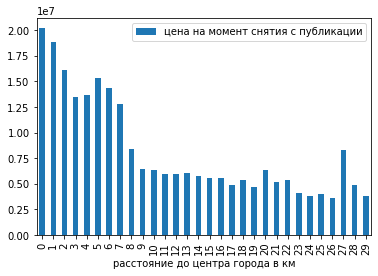

In [63]:
data[data['название населённого пункта']=='санкт-петербург'].pivot_table(index='расстояние до центра города в км',
                                                                         values='цена на момент снятия с публикации',
                                                                         aggfunc='mean').plot(kind='bar')

**Общий вывод**

Для определения рыночной стоимости объектов недвижимости важны следующие параметры:

* общая площадь квартиры (аномальные значения: более 114,25 кв. м)

* расстояние до центра города (центр города огранчен окружностью радиусом 8 км)

* число комнат и этаж квартиры (чем ближе к центру, тем эти факторы весомее)

* срок продажи квартиры (слишком быстрая продажа — до 1 месяца (особенно аномальные сроки меньше 2-х недель), слишком долгая продажа — более 14 месяцев (428 дней))

кроме того, необходимо ввести ограничения на ввод данных о высоте потолков: допущено множество ручных ошибок (27 м вместо 2,7 м, потолки менее 2 м и т.д.).